In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [17]:
# CHANGE ONLY THIS IF YOUR PATH IS DIFFERENT
BASE_PATH = r"E:\people-analytics\data\PETA\PETA dataset"
SUBSET = "CUHK"

IMAGE_DIR = os.path.join(BASE_PATH, SUBSET, "archive")
LABEL_PATH = os.path.join(IMAGE_DIR, "Label.txt")

print("Image dir:", IMAGE_DIR)
print("Label path:", LABEL_PATH)
print("Images count:", len(os.listdir(IMAGE_DIR)))
print("Label file exists:", os.path.exists(LABEL_PATH))


Image dir: E:\people-analytics\data\PETA\PETA dataset\CUHK\archive
Label path: E:\people-analytics\data\PETA\PETA dataset\CUHK\archive\Label.txt
Images count: 4564
Label file exists: True


In [19]:
records = []

with open(LABEL_PATH, "r") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue

        parts = line.split()

        image_name = parts[0]
        attributes = parts[1:]

        records.append({
            "image_path": os.path.join(IMAGE_DIR, image_name),
            "attributes": attributes
        })

df = pd.DataFrame(records)
df.head()


,image_path,attributes
0,E:\people-analytics\data\PETA\PETA dataset\CUH...,"[upperBodyGrey, lowerBodyGrey, hairBlack, foot..."
1,E:\people-analytics\data\PETA\PETA dataset\CUH...,"[upperBodyBlack, lowerBodyGrey, hairBlack, foo..."
2,E:\people-analytics\data\PETA\PETA dataset\CUH...,"[upperBodyGrey, lowerBodyBrown, hairBlack, foo..."
3,E:\people-analytics\data\PETA\PETA dataset\CUH...,"[upperBodyBlack, upperBodyBlue, lowerBodyBlack..."
4,E:\people-analytics\data\PETA\PETA dataset\CUH...,"[upperBodyRed, lowerBodyBlue, hairBlack, footw..."


In [20]:
df["image_exists"] = df["image_path"].apply(os.path.exists)
df["image_exists"].value_counts()


image_exists
True     4563
False       2
Name: count, dtype: int64

In [21]:
print("Before cleanup:", len(df))

df = df[df["image_exists"]].reset_index(drop=True)

print("After cleanup:", len(df))


Before cleanup: 4565
After cleanup: 4563


In [22]:
missing = df[df["image_exists"] == False]
missing


,image_path,attributes,image_exists


In [23]:
df["image_exists"].value_counts()


image_exists
True    4563
Name: count, dtype: int64

In [26]:
from collections import Counter

In [27]:
all_attrs = [attr for attrs in df["attributes"] for attr in attrs]
attr_counts = Counter(all_attrs)

len(attr_counts)


101

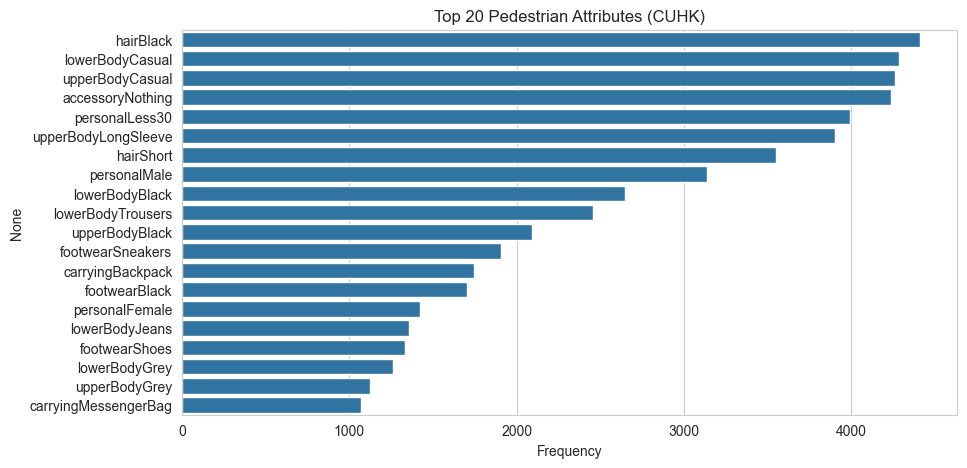

In [28]:
top_attrs = pd.Series(attr_counts).sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_attrs.values, y=top_attrs.index)
plt.title("Top 20 Pedestrian Attributes (CUHK)")
plt.xlabel("Frequency")
plt.show()


In [29]:
selected_attributes = [
    "personalMale",
    "personalFemale",
    "personalLess30",
    "personalLess45",
    "upperBodyCasual",
    "upperBodyFormal",
    "upperBodyJacket",
    "upperBodyTshirt",
    "lowerBodyJeans",
    "lowerBodyTrousers",
    "carryingBackpack",
    "carryingMessengerBag"
]

for attr in selected_attributes:
    df[attr] = df["attributes"].apply(lambda x: 1 if attr in x else 0)

df[selected_attributes].head()


,personalMale,personalFemale,personalLess30,personalLess45,upperBodyCasual,upperBodyFormal,upperBodyJacket,upperBodyTshirt,lowerBodyJeans,lowerBodyTrousers,carryingBackpack,carryingMessengerBag
0,1,0,1,0,1,0,0,0,0,1,0,0
1,0,1,1,0,1,0,0,0,1,0,0,1
2,1,0,1,0,1,0,0,0,0,1,0,0
3,1,0,0,1,1,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,1,0,1


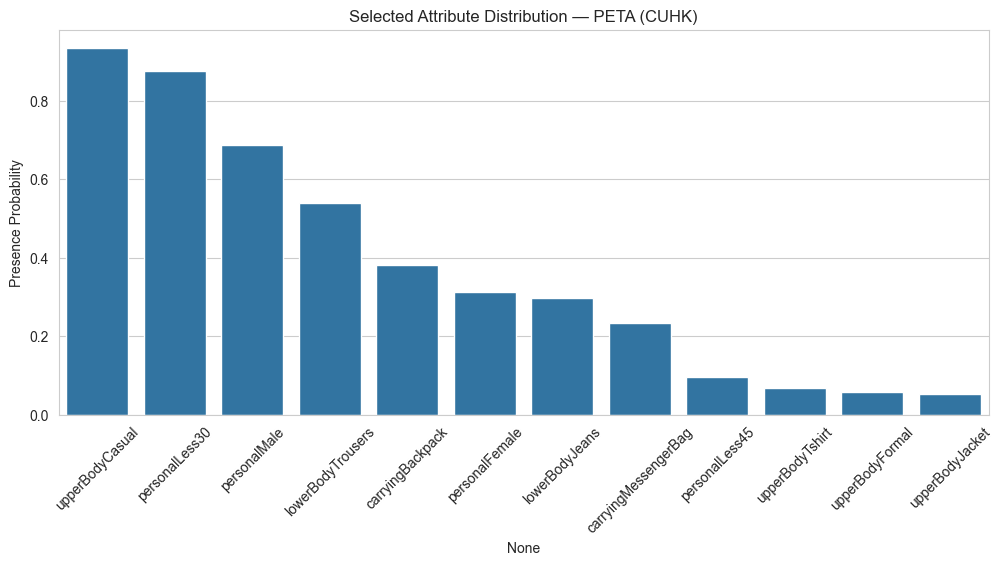

In [30]:
attr_means = df[selected_attributes].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=attr_means.index, y=attr_means.values)
plt.xticks(rotation=45)
plt.title("Selected Attribute Distribution — PETA (CUHK)")
plt.ylabel("Presence Probability")
plt.show()
